<a href="https://colab.research.google.com/github/Shirish2004/EOG_Movement_Classification/blob/main/Ensemble_Methods_Self_Eye_State.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ensemble techniques are a great way in industry right now to use multiple classifiers so as to build a strong classifier where the prediction is based on weighted average or majority voting technique. 
We will be first looking for random forest then the gradient boosting classifer followed by grid search for each of them to select the optimal parameters and then decide which model to go for 

In [10]:
#mount google drive
from google.colab import drive 
drive.mount("/content/drive")
#reading the data 
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/Datasets_used_for_model/self_eye_state.csv")
from sklearn.utils import shuffle 
data=shuffle(data)
data=data.dropna()
print(data.head(),data.tail(),data.info())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30020 entries, 4962 to 8771
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pd_t    30020 non-null  float64
 1   target  30020 non-null  float64
dtypes: float64(2)
memory usage: 703.6 KB
        pd_t  target
4962   26.30     0.0
10823  31.15     0.0
5722   37.36     0.0
28396  -0.33     1.0
18805   8.47     1.0          pd_t  target
25314   15.63     0.0
29987   -0.85     1.0
25727 -343.56     0.0
866   -305.25     0.0
8771    22.63     0.0 None


In [11]:
#Standardising and splitting the data
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler 
import numpy as np 
np.random.seed(32)#to reproduce the results
scaler=StandardScaler()
X=np.array(data.pd_t).reshape(-1,1)
Y=np.array(data.target)
print("Shape of X is ",X.shape,"\n Shape of Y is ",Y.shape)
scaler.fit_transform(X)
print("Data standardised")
#splitting the data
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.2,random_state=32)
print("Data split")

Shape of X is  (30020, 1) 
 Shape of Y is  (30020,)
Data standardised
Data split


In [12]:
#plotting the confussion matrix and printing the classification report 
def confusion_classification(actual,predicted):
  import seaborn as sn 
  from sklearn.metrics import confusion_matrix, classification_report
  import matplotlib.pyplot as plt 
  %matplotlib inline
  cr=classification_report(actual,predicted)
  cm=confusion_matrix(actual,predicted)
  #plotting as heatmap for better visualization 
  sn.heatmap(cm,annot=True,fmt='.2f')
  plt.ylabel("Actual")
  plt.xlabel("Predicted")
  plt.show()
  print(cr)
#Drawing the Roc-AUC curve 
'''ROC-AUC curve is one most considerable and trustworthy metric for selecting a model'''
def draw_roc_auc(model,test_X,test_Y):
  from sklearn.metrics import plot_roc_curve, roc_curve,roc_auc_score
  fpr, tpr, thresholds =roc_curve(test_Y,model.predict(test_X))
  auc_score=roc_auc_score(test_Y,model.predict_proba(test_X)[:,1])
  #plotting fpr,tpr and thresholds
  import matplotlib.pyplot as plt 
  %matplotlib inline
  plt.plot(fpr,tpr,thresholds,label="ROC Curve (area=%.2f)"%auc_score)
  #plotting a diagonal line from (0,1)
  plt.plot([0,1],[0,1],'k--')
  plt.xlim([0.0,1.0])
  plt.ylim([0.0,1.05])
  plt.ylabel("FPR")
  plt.xlabel("TPR")
  plt.legend(loc="lower right")
  plt.title("Reciever operating Characteristic curve")
  plt.show()
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(max_depth=10,n_estimators=10)
rf_clf.fit(X_train,Y_train)



RandomForestClassifier(max_depth=10, n_estimators=10)

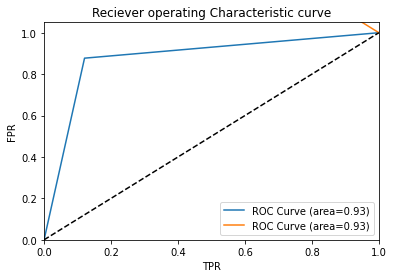

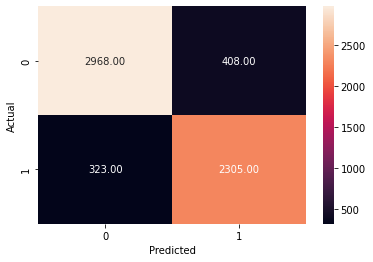

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89      3376
         1.0       0.85      0.88      0.86      2628

    accuracy                           0.88      6004
   macro avg       0.88      0.88      0.88      6004
weighted avg       0.88      0.88      0.88      6004



In [13]:
draw_roc_auc(rf_clf,X_test,Y_test)
confusion_classification(Y_test,rf_clf.predict(X_test))

**GRID SEARCH**

In [14]:
tuned_parameters=[{'max_depth':[10,15,20],'n_estimators':[10,15,20,25],'max_features':['sqrt','log2','auto']}]
from sklearn.model_selection import GridSearchCV
optimum_rf=GridSearchCV(RandomForestClassifier(),tuned_parameters,cv=10,scoring='roc_auc')
optimum_rf.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 15, 20],
                          'max_features': ['sqrt', 'log2', 'auto'],
                          'n_estimators': [10, 15, 20, 25]}],
             scoring='roc_auc')

In [15]:
#getting the model best score ,its best params and grid_scores 
print("The best score of model is ",optimum_rf.best_score_,"\n The best parameters of model are ",optimum_rf.best_params_,"\n The grid scores of model are ",optimum_rf.cv_results_)#earlier cv_results were called grid scores



The best score of model is  0.9371850432377773 
 The best parameters of model are  {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 25} 
 The grid scores of model are  {'mean_fit_time': array([0.338814  , 0.32745996, 0.4363703 , 0.54872992, 0.2193439 ,
       0.32948134, 0.4390893 , 0.54574356, 0.21988394, 0.33020065,
       0.43344598, 0.54649053, 0.37698638, 0.43573515, 0.52525878,
       0.65182247, 0.26184967, 0.39188092, 0.52612317, 0.65503504,
       0.26160357, 0.39631422, 0.5825177 , 0.65270119, 0.28716078,
       0.42059662, 0.5571095 , 0.69568861, 0.27745903, 0.4285291 ,
       0.55860848, 0.7015728 , 0.28246136, 0.42676368, 0.56726637,
       0.71508441]), 'std_fit_time': array([0.1288831 , 0.00659573, 0.00754501, 0.00678758, 0.00488986,
       0.00573813, 0.00589286, 0.0059974 , 0.00373493, 0.00674195,
       0.0047641 , 0.00575551, 0.07346574, 0.08065557, 0.00522237,
       0.00802421, 0.00433072, 0.00523356, 0.01111727, 0.00799414,
       0.00434885, 0.00347705, 

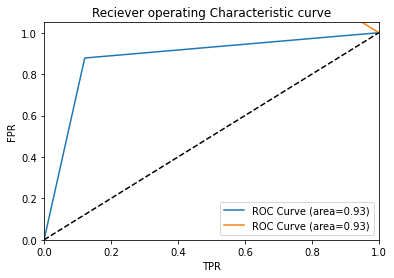

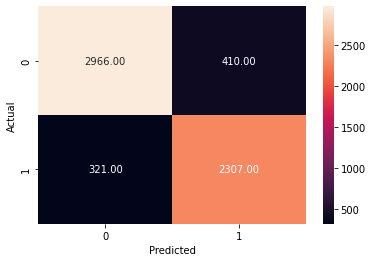

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89      3376
         1.0       0.85      0.88      0.86      2628

    accuracy                           0.88      6004
   macro avg       0.88      0.88      0.88      6004
weighted avg       0.88      0.88      0.88      6004



In [18]:
#building the model with best params
rf=RandomForestClassifier(max_depth=10,n_estimators=25,max_features='auto')
rf.fit(X_train,Y_train)
draw_roc_auc(rf,X_test,Y_test)
confusion_classification(Y_test,rf.predict(X_test))

Building Gradient Boosting Classifier

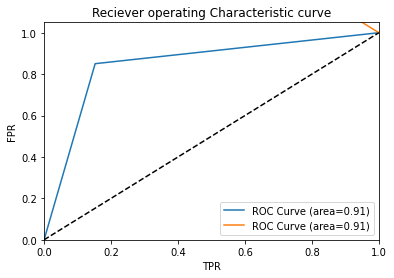

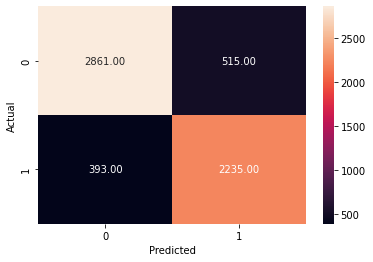

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86      3376
         1.0       0.81      0.85      0.83      2628

    accuracy                           0.85      6004
   macro avg       0.85      0.85      0.85      6004
weighted avg       0.85      0.85      0.85      6004



In [17]:
from sklearn.ensemble import GradientBoostingClassifier
gd_boost=GradientBoostingClassifier(n_estimators=1000,max_depth=10)
gd_boost.fit(X_train,Y_train)
draw_roc_auc(gd_boost,X_test,Y_test)
confusion_classification(Y_test,gd_boost.predict(X_test))

From above it is clear that the Random forest model perfroms better than the Gradient Boosting Classifier. 

Although the GDBoost Classifier has optimization of Gradient descent and baseline classifier as decision tree it appears to under perform 
